# Predictive_maintenance

### But

L'objectif est d'utiliser des algorithmes de clustering sur un ensemble de données de maintenance prédictive pour regrouper les produits en fonction de leurs caractéristiques. Cette approche permettra de mieux comprendre les similarités entre les produits et d'identifier des sous-groupes homogènes. En segmentant les produits de cette manière, nous pourrons développer des modèles de maintenance prédictive plus précis pour prédire avec précision les défaillances des produits. 

## Index

1-Collecte des donnees 

2-Traitement de données

3-Analyse exploratoire des données et visualisation des données

4-Clustering

## 1-Collecte des données

### Source :

Les données ont été collectées à partir du célèbre site web Kaggle qui contient de nombreux ensembles de données et informations utiles.
        
   Lien : https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification



### Importer les bibliothèque & dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataset = "predictive_maintenance.csv"
data = pd.read_csv(dataset)
data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [2]:
data.shape

(10000, 10)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


# Description de l'ensemble de données sur la maintenance prédictive
  • Product ID: C'est un identifiant unique attribué à chaque produit dans l ensemble de données.
  
  • Type: Indique la catégorie à laquelle chaque produit appartient, classée en faible (L), moyen (M) ou élevé (H).
  
  • Air temperature [K]: Cela représente la température de l'air en Kelvin.
  
  • Process temperature [K]: Il s agit de la température du processus en Kelvin.
  
  • Rotational speed [rpm]: C'est la vitesse de rotation de la machine, mesurée en tours par minute (RPM).
  
  • Torque [Nm]: Le couple représente la force de rotation appliquée par la machine, mesurée en Newton-mètres (Nm).
  
  • Tool wear [min]: Il s'agit du temps d'utilisation de l'outil, mesuré en minutes.
  
  • Target: Indique si une défaillance s est produite ou non.
  
  • Failure Type: Si une défaillance s'est produite, cette colonne indique le type de défaillance.

## 2-Traitement des données

In [4]:
#vérifier les valeurs manquantes
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
#vérifier les valeurs manquantes
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [6]:
#vérifier les valeurs dupliqués 
data.duplicated().sum().any()

False

In [7]:
#On supprime la colonne Failure Type pour rendre notre dataset non étiqueté 
X=data.drop('Failure Type',axis=1)

In [8]:
X.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0


In [9]:
#meme procedure pour la colonne target
df=X.drop('Target',axis=1)

In [10]:
df.head(2)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,M14860,M,298.1,308.6,1551,42.8,0
1,2,L47181,L,298.2,308.7,1408,46.3,3


In [11]:
#Renommer les colonnes 
df.columns=['UDI','product_ID','type','air_temperature','process_temperature','rotational_speed','torque','toolwear']

In [12]:
# rendre la colonne UDI comme index de notre tableau
df=df.set_index('UDI')

In [13]:
df.head()

,product_ID,type,air_temperature,process_temperature,rotational_speed,torque,toolwear
UDI,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0
2,L47181,L,298.2,308.7,1408,46.3,3
3,L47182,L,298.1,308.5,1498,49.4,5
4,L47183,L,298.2,308.6,1433,39.5,7
5,L47184,L,298.2,308.7,1408,40.0,9


In [14]:
dataset=df.drop('product_ID',axis=1)
dataset.head()

,type,air_temperature,process_temperature,rotational_speed,torque,toolwear
UDI,,,,,,
1,M,298.1,308.6,1551,42.8,0
2,L,298.2,308.7,1408,46.3,3
3,L,298.1,308.5,1498,49.4,5
4,L,298.2,308.6,1433,39.5,7
5,L,298.2,308.7,1408,40.0,9


## 3- Analyse exploratoire des données et visualisation des données


Inspecter la relation entre chaque caractéristique à l'aide d'un diagramme à paires

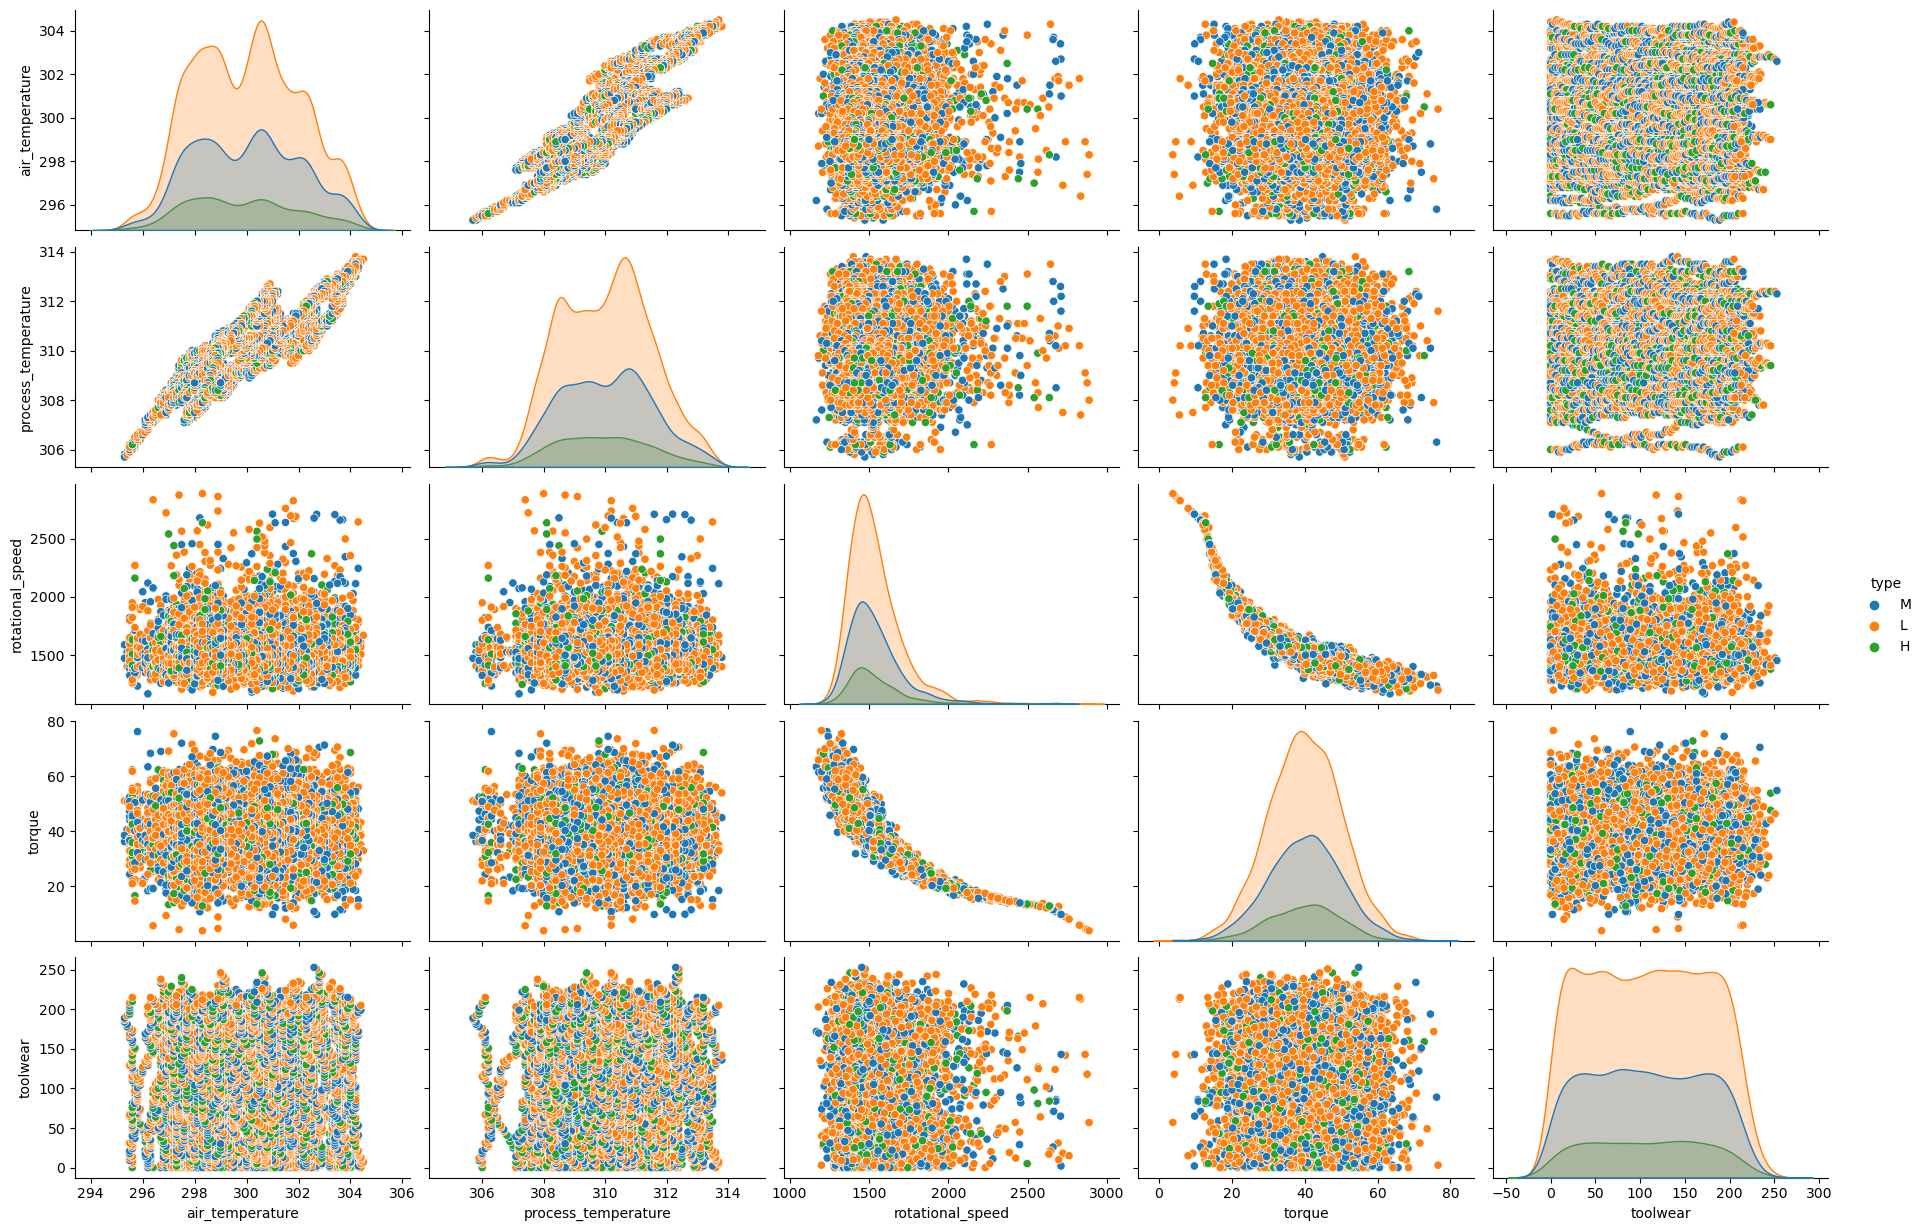

In [15]:
import warnings
warnings.simplefilter(action='ignore')
sns.pairplot(data=dataset, hue='type',aspect=1.5)
plt.show()

       •Le graphique ci-dessus montre qu'il n'y a pas une différence évidente entre les trois types des produits
       •Par conséquent,nous allons supprimer la colonne'type'

## 4- Clustering

Suppression de la colonne "type" pour nos trois techniques de regroupement basées sur la distance.

In [16]:
data_set=dataset.drop('type',axis=1)

In [17]:
data_set.head()

,air_temperature,process_temperature,rotational_speed,torque,toolwear
UDI,,,,,
1,298.1,308.6,1551,42.8,0
2,298.2,308.7,1408,46.3,3
3,298.1,308.5,1498,49.4,5
4,298.2,308.6,1433,39.5,7
5,298.2,308.7,1408,40.0,9


Le regroupement K-Means est l'un des algorithmes de regroupement les plus simples et les plus couramment utilisés. Il fonctionne comme suit :

Attribuer aléatoirement k = n_clusters de centres de cluster (centroïdes). Attribuer chaque point de données aux centroïdes les plus proches. Calculer la moyenne de tous les points de chaque grappe et réaffecter le centroïde de chaque grappe comme moyenne. Réaffecter chaque point de données au centroïde le plus proche sur la base de la distance euclidienne. Répétez les étapes 3 et 4 jusqu'à ce que la somme totale de la variation intra-groupe sur les trois groupes soit minimale.

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
clusters = []
ss = []

#Calculer toutes les sommes des variances intra-clusters pour n_clusters de 2 à 14

for i in range(2,15):
    km = KMeans(n_clusters = i)
    km.fit(data_set)
    clusters.append(km.inertia_)
    ss.append(silhouette_score(data_set, km.labels_, metric='euclidean'))

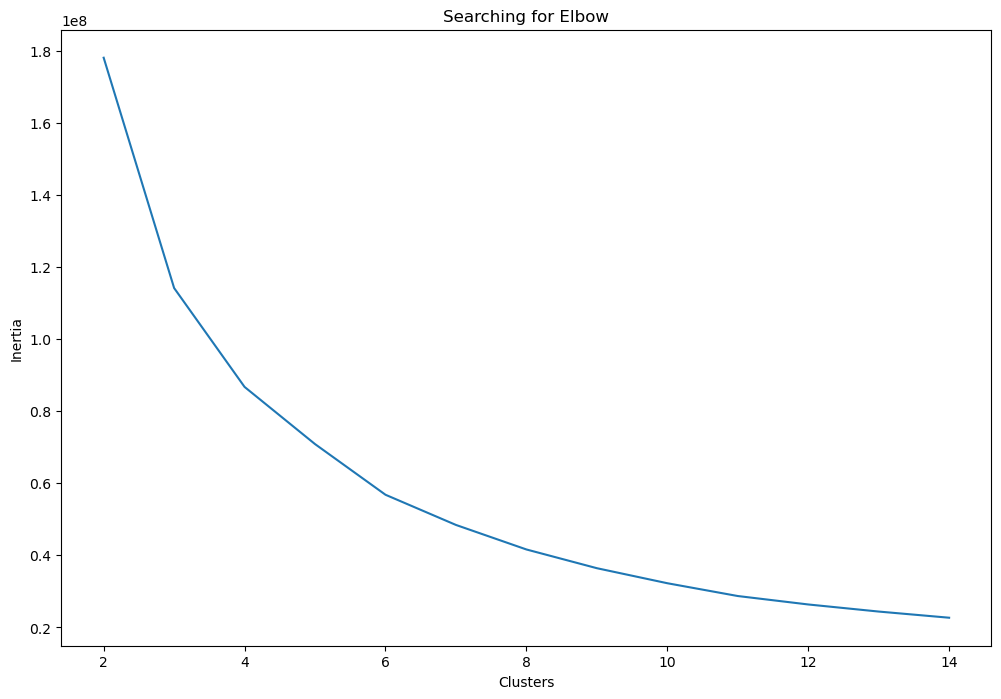

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(2, 15)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

d'apres le graphe ci-dessus on doit choisir les deux points de coude (2 et 3), de les utiliser pour le clustering, d'évaluer les résultats sur la base de notre connaissance du domaine et enfin de choisir le meilleur n_clusters. Augmenter le nombre de grappes à partir de ce point n'apporte pas beaucoup d'informations supplémentaires et peut produire des résultats indésirables. En règle générale, nous choisissons les n_clusters en fonction du point de coude.

Text(0, 0.5, 'Silhouette Score')

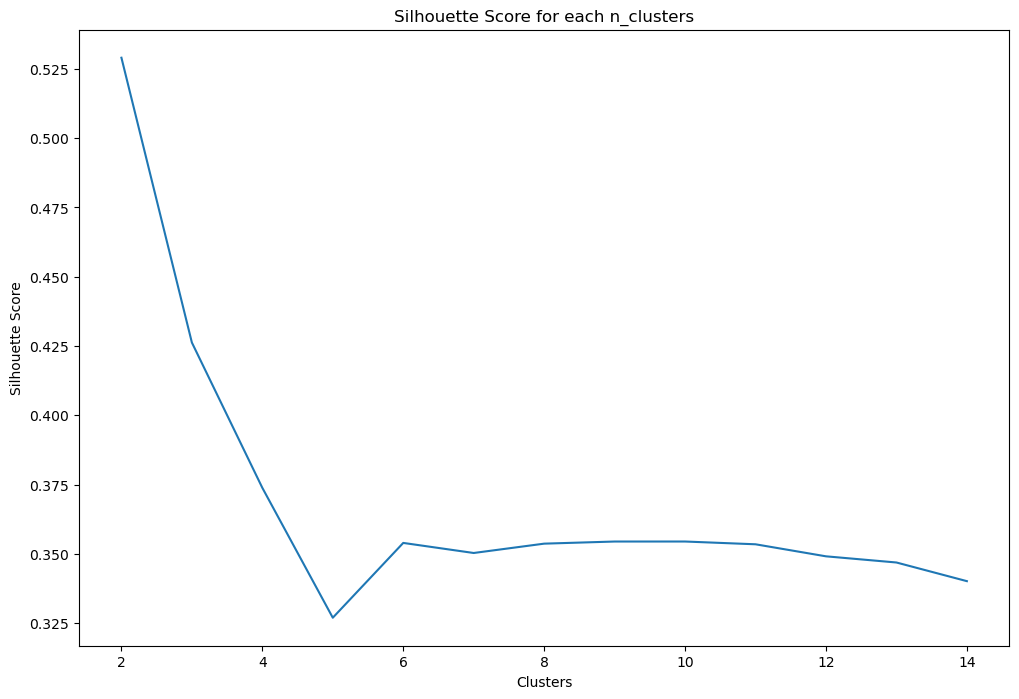

In [20]:
#le graphe du silhouette_score
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(2, 15)), y=ss, ax=ax)
ax.set_title('Silhouette Score for each n_clusters')
ax.set_xlabel('Clusters')
ax.set_ylabel('Silhouette Score')

      d'aprés le graphe on remarque que le score de silhouette tant vers -1 donc on a crée trop de grappes 

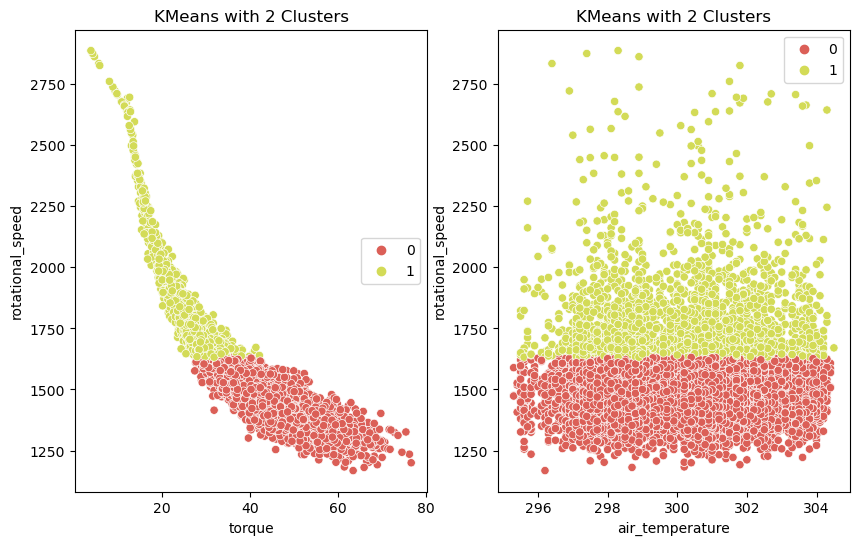

In [22]:
#Pour le torque et rotational_speed
km2 = KMeans(n_clusters=2).fit(data_set)

data_set['Labels'] = km2.labels_

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(x=data_set['torque'], y=data_set['rotational_speed'], hue='Labels', 
                palette=sns.color_palette('hls', 6),data=data_set)
ax.set_title('KMeans with 2 Clusters')
ax.legend(loc='center right')

#Pour le air_temperature et rotational_speed
ax = fig.add_subplot(122)
sns.scatterplot(x=data_set['air_temperature'], y=data_set['rotational_speed'], hue='Labels', 
                palette=sns.color_palette('hls', 6),data=data_set)
ax.set_title('KMeans with 2 Clusters')
ax.legend(loc='upper right')

plt.show()

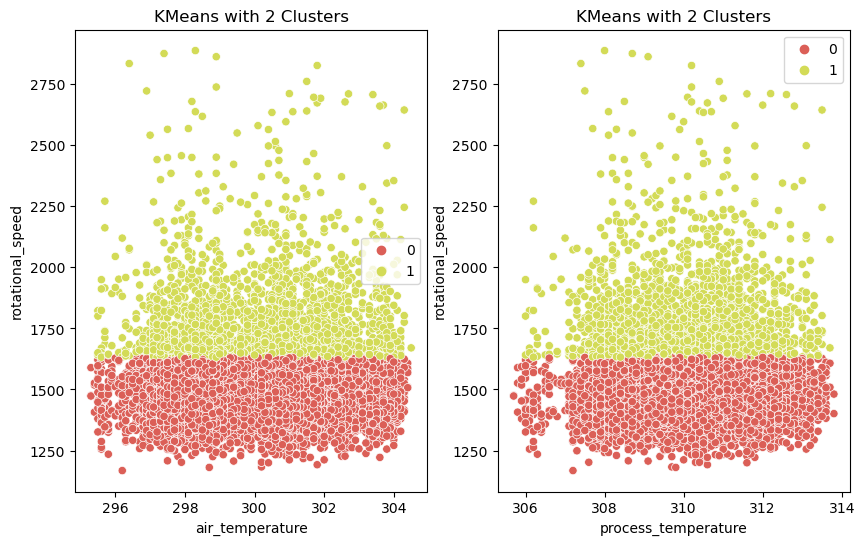

In [25]:
#Pour le air_temperature et rotational_speed
km2 = KMeans(n_clusters=2).fit(data_set)

data_set['Labels'] = km2.labels_

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(x=data_set['air_temperature'], y=data_set['rotational_speed'], hue='Labels', 
                palette=sns.color_palette('hls', 6),data=data_set)
ax.set_title('KMeans with 2 Clusters')
ax.legend(loc='center right')

#Pour le process_temperature et rotational_speed
ax = fig.add_subplot(122)
sns.scatterplot(x=data_set['process_temperature'], y=data_set['rotational_speed'], hue='Labels', 
                palette=sns.color_palette('hls', 6),data=data_set)
ax.set_title('KMeans with 2 Clusters')
ax.legend(loc='upper right')

plt.show()

      Donc on opte pour k=2 qui représente les clusters.